## Importing 

In [41]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import healpy as hp
import astropy.units as u
from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from tqdm.notebook import tqdm

In [3]:
gnom_proj_file = fits.open("/data/cassegrain/HI4Pi/TAN/TAN_E01.fits")

In [4]:
gnom_proj_file.info()

Filename: /data/cassegrain/HI4Pi/TAN/TAN_E01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   (269, 274, 933)   float32   


In [5]:
gnom_proj_hdu = gnom_proj_file[0]

In [7]:
gnom_proj_hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  269                                                  
NAXIS2  =                  274                                                  
NAXIS3  =                  933                                                  
OBJECT  = 'HI4PI   '           / The HI 4-PI Survey                             
TELESCOP= 'Effelsberg 100m RT; ATNF Parkes 64-m' / Telescope names              
ORIGIN  = 'AIfA/MPIfR Bonn; ATNF Sydney' / Organisations or Institutions        
REFERENC= 'HI4PI Collaboration 2016' / A&A                                      
RESTFRQ =        1420405751.77                                                  
RESTWAV =       0.211061140541                                                  
WCSAXES =                   

In [8]:
gnom_proj_data = gnom_proj_hdu.data

In [9]:
gnom_proj_data.shape

(933, 274, 269)

In [3]:
def loadfits(filename): 
    '''
    Return the HDU,central pixel wavelength and velocity gradient.
    '''
    file = fits.open('/data/cassegrain/HI4Pi/HEALPix/'+filename)
    HDU = file[1]
    vel_grd = HDU.header['1CDLT6']         # Velocity gredient
    cen_pix = '%3d'%(HDU.header['1CRPX6']) 
    return HDU,cen_pix,vel_grd

def cvt2vel(f,filename):
    '''
    Convert the bin indices of pixels to velocity
    '''
    HDU,cen_pix,vel_grd = loadfits(filename)
    vel = (f-int(cen_pix)) * vel_grd
    return vel

def cvt2tot_v(v,l):
    '''
    Convert the velocity from solar local frame to  galatic frame. Unit:m/s
    '''
    v_sun = 200e3 
    v_tot = v+v_sun*np.sin(np.pi*l/180)
    return v_tot

def arg_velmax(filename,noise_thread = 3):
    '''
    Args:
    filename: the fits file to open.
    noise_thread: the back noise level in antena temperature. Suggested to be 5.This means temperature must be above 5 to be considered.
    
    Return:
    return the list of pixel number and the frequency of the highest velocity above the threadhold. 
    '''
    fqcs,indexs = [],[]

    HDU,_,_ = loadfits(filename)
    index = np.argwhere(HDU.data.field("GLAT") == 0)
    index = [i[0] for i in index] ## the args index for where the maximum frequency is found
    
    for idx in index:
        if np.argwhere(
            HDU.data['DATA'][idx]> noise_thread
        ).size > 0:
            arg = np.argwhere(HDU.data['DATA'][idx]> noise_thread).max()
#             max_fqc = HDU.data['DATA'][idx][arg]
            
            fqcs.append(arg)
            indexs.append(idx)
            
    return np.array(indexs),np.array(fqcs)

def arg_velmin(filename,noise_thread = 3):
    '''
    Args:
    filename: the fits file to open.
    noise_thread: the back noise level in antena temperature. Suggested to be 5.This means temperature must be above 5 to be considered.
    
    Return:
    return the list of pixel number and the frequency of the highest velocity above the threadhold. 
    '''
    fqcs,indexs = [],[]

    HDU,_,_ = loadfits(filename)
    index = np.argwhere(HDU.data.field("GLAT") == 0)
    index = [i[0] for i in index] ## the args index for where the maximum frequency is found
    
    for idx in index:
        if np.argwhere(
            HDU.data['DATA'][idx]> noise_thread
        ).size > 0:
            arg = np.argwhere(HDU.data['DATA'][idx]> noise_thread).min()
#             max_fqc = HDU.data['DATA'][idx][arg]
            
            fqcs.append(arg)
            indexs.append(idx)
            
    return np.array(indexs),np.array(fqcs)

In [56]:
y

array([0.39281684, 2.04252836, 4.27777778, 7.06750082, 7.39819682,
       7.43227501, 7.6013922 , 8.10568917])

### Example of Spectrums 

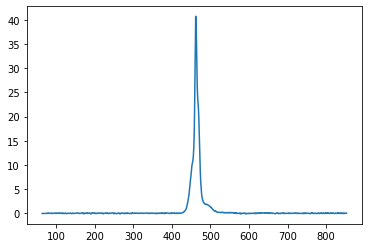

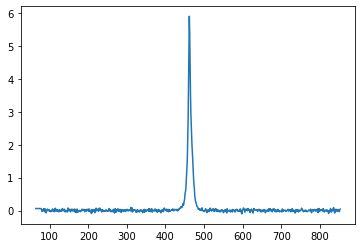

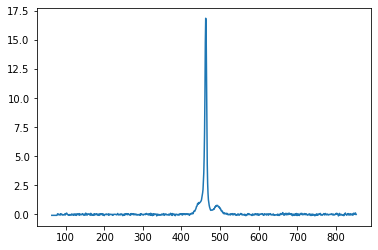

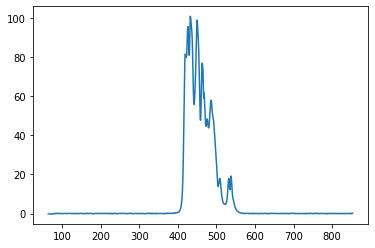

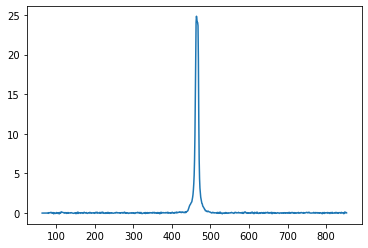

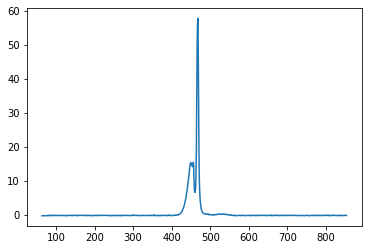

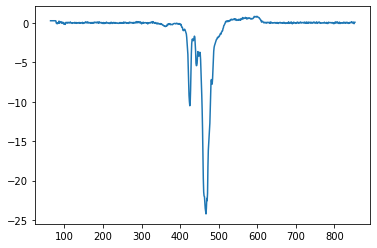

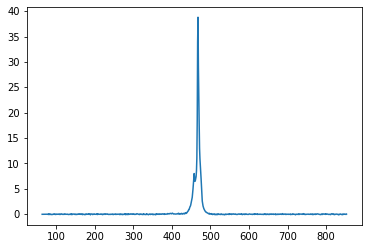

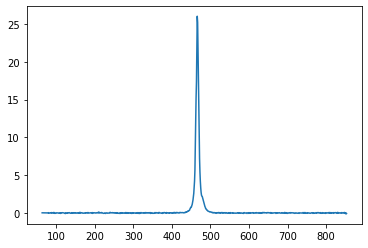

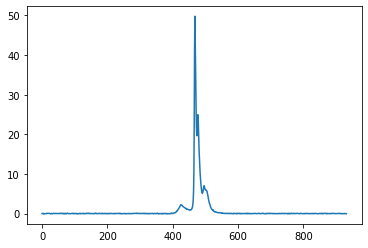

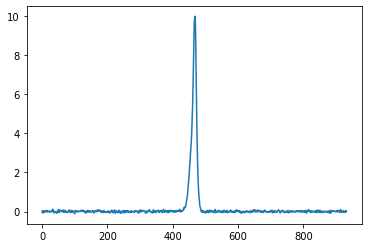

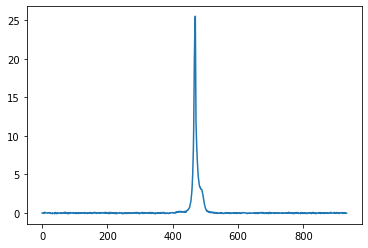

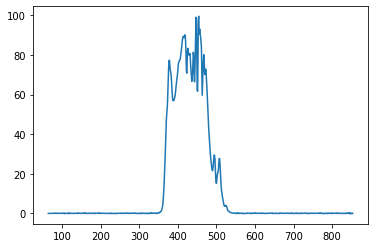

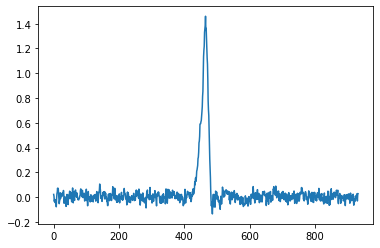

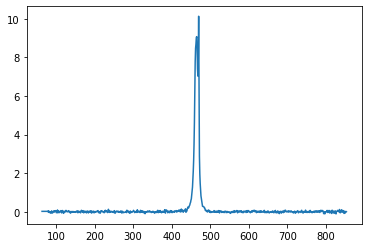

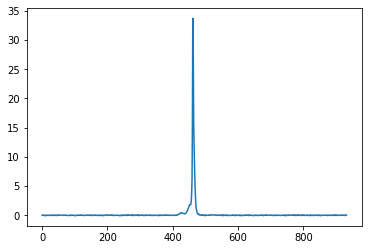

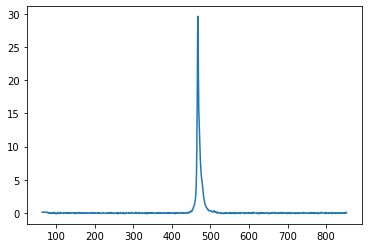

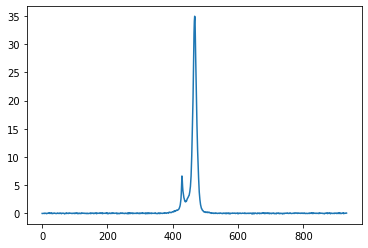

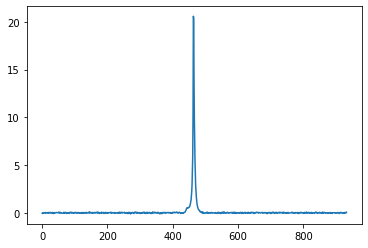

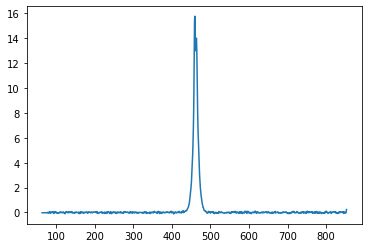

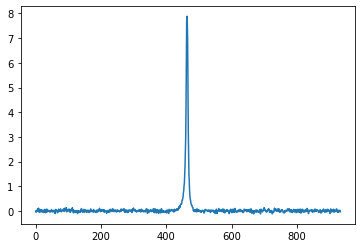

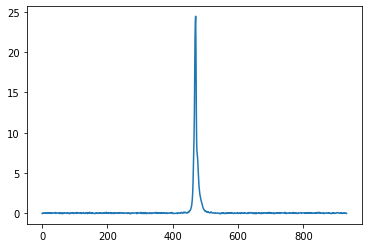

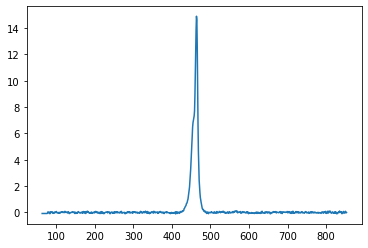

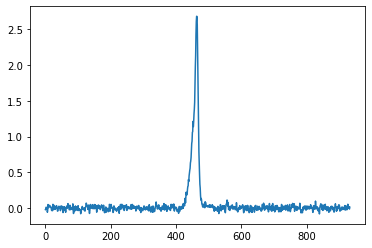

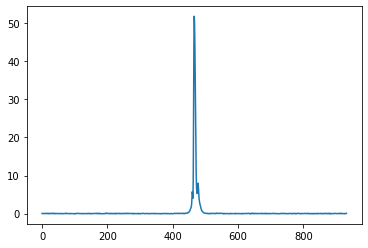

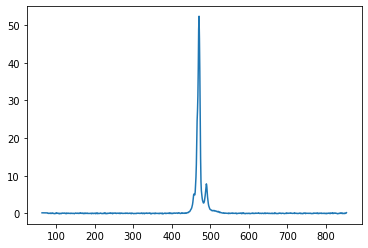

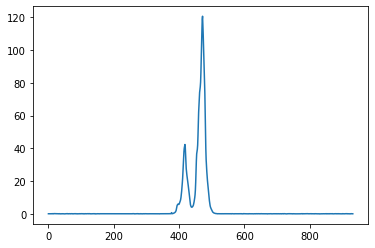

KeyboardInterrupt: 

In [6]:
for filename in os.listdir('/data/cassegrain/HI4Pi/HEALPix/'):
    file = fits.open('/data/cassegrain/HI4Pi/HEALPix/'+filename)
    HDU = file[1]
    GLON_max = np.max(file[1].data.field("GLON"))
#     GLAT_min, GLAT_max = np.min(file[1].data.field("GLAT")),np.max(file[1].data.field("GLAT"))

    if GLON_max < 90 or GLON_max > 270:
#         plt.figure(figsize=(10,6))
        plt.plot(HDU.data["DATA"][0][:200,]) 
        

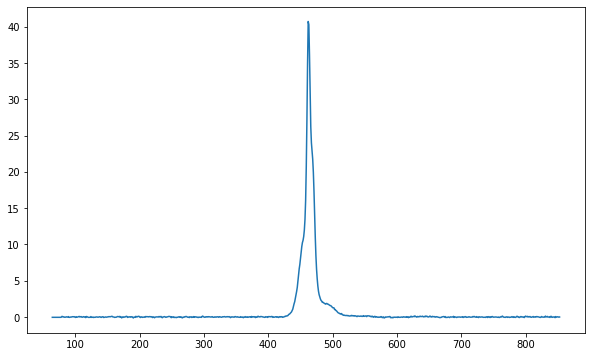

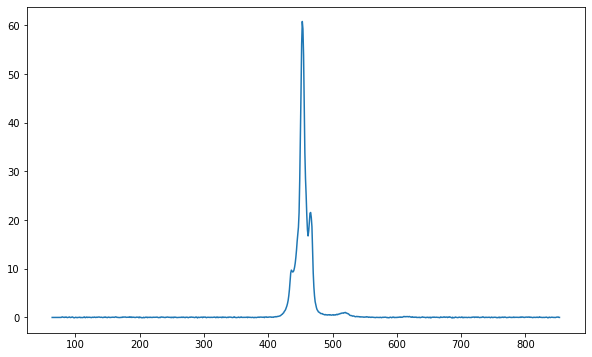

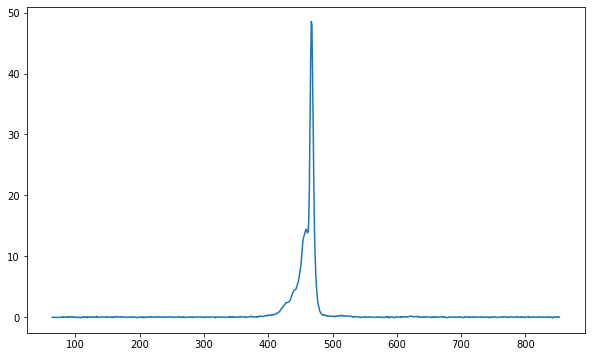

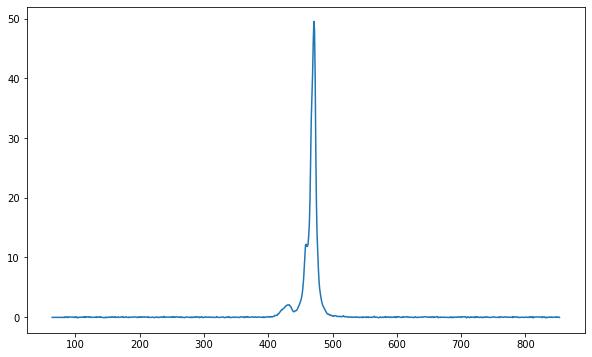

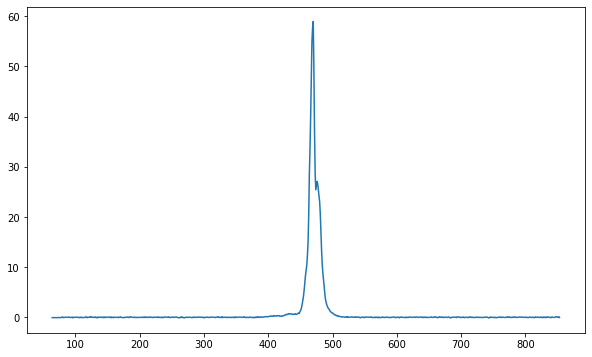

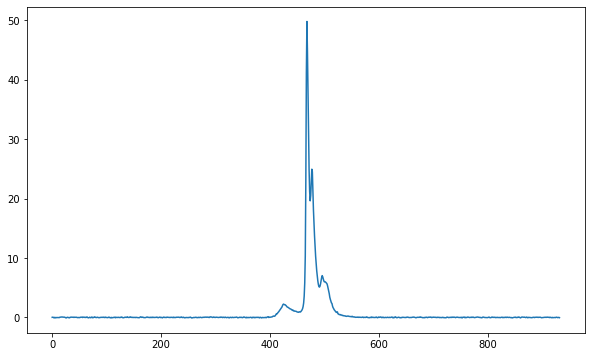

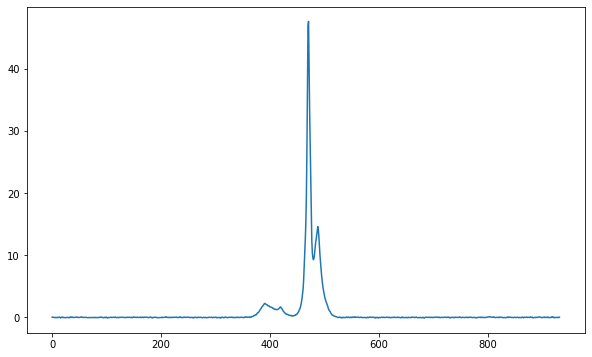

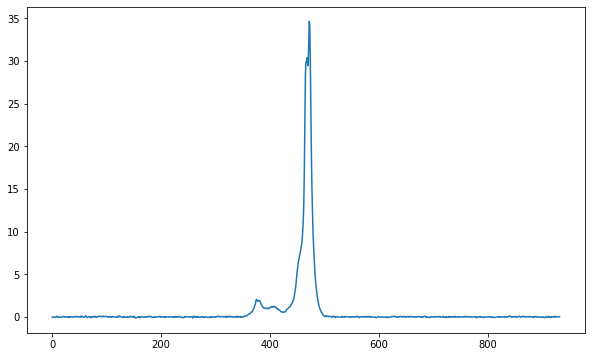

In [17]:
for filename in ['HPX_101.fits','HPX_102.fits','HPX_103.fits','HPX_104.fits','HPX_089.fits','HPX_090.fits','HPX_091.fits','HPX_092.fits']:
    file = fits.open('/data/cassegrain/HI4Pi/HEALPix/'+filename)

    HDU = file[1]
    GLON_max = np.max(file[1].data.field("GLON"))
    #     GLAT_min, GLAT_max = np.min(file[1].data.field("GLAT")),np.max(file[1].data.field("GLAT"))

    if GLON_max < 90 or GLON_max > 270:
        plt.figure(figsize=(10,6))
        plt.plot(HDU.data["DATA"][0]) 

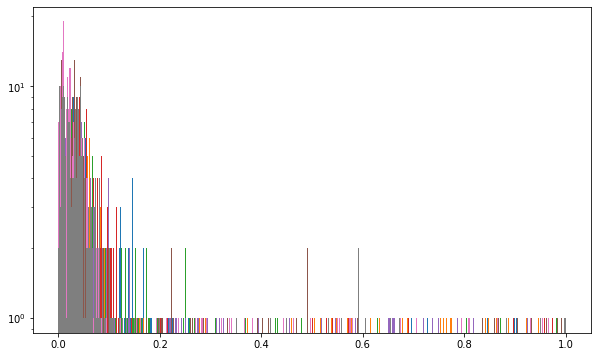

In [42]:
plt.figure(figsize=(10,6))
for filename in ['HPX_101.fits','HPX_102.fits','HPX_103.fits','HPX_104.fits','HPX_089.fits','HPX_090.fits','HPX_091.fits','HPX_092.fits']:
# for filename in ['HPX_101.fits']:
    file = fits.open('/data/cassegrain/HI4Pi/HEALPix/'+filename)

    HDU = file[1]
    GLON_max = np.max(file[1].data.field("GLON"))
    #     GLAT_min, GLAT_max = np.min(file[1].data.field("GLAT")),np.max(file[1].data.field("GLAT"))
  
    if GLON_max < 90 or GLON_max > 270:
        x = HDU.data["DATA"][0]
        plt.hist(x,bins = 1000,log=True,range=(0,1)) 

In [26]:
np.sort(HDU.data["DATA"][0])

array([-1.36201456e-01, -1.30918145e-01, -1.28863856e-01, -1.27883092e-01,
       -1.02154650e-01, -1.01581089e-01, -1.01529852e-01, -1.01323240e-01,
       -1.00816675e-01, -9.68301967e-02, -9.53792781e-02, -9.40760300e-02,
       -9.10770968e-02, -8.95920619e-02, -8.84229839e-02, -8.62152129e-02,
       -8.61322433e-02, -8.45228136e-02, -8.38328153e-02, -8.07517394e-02,
       -7.84115344e-02, -7.80928060e-02, -7.78358057e-02, -7.74092153e-02,
       -7.60489553e-02, -7.55983070e-02, -7.40608275e-02, -7.40168095e-02,
       -7.18068853e-02, -7.15554506e-02, -7.12799728e-02, -7.09476769e-02,
       -7.06860349e-02, -7.00276718e-02, -6.97845593e-02, -6.89697415e-02,
       -6.85346648e-02, -6.80690631e-02, -6.80290163e-02, -6.80208132e-02,
       -6.77212477e-02, -6.65678456e-02, -6.54791221e-02, -6.52809143e-02,
       -6.50794879e-02, -6.47094920e-02, -6.44709319e-02, -6.43108338e-02,
       -6.41890615e-02, -6.35010600e-02, -6.17052205e-02, -6.09670319e-02,
       -6.09259829e-02, -